<a href="https://colab.research.google.com/github/thanhhoai2k4/DU_DOAN_SO_VIET_TAY/blob/main/NHAN_DIEN_XE_CAR_CHIM_CHO_MEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras.optimizers import Adam

In [191]:
#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

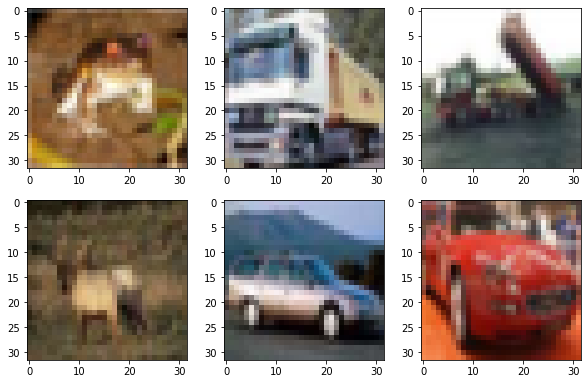

In [192]:
n = 6
plt.figure(figsize=(10,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()


In [193]:
X_val, y_val = X_train[40000:50000,:] , y_train[40000:50000]
X_train , y_train = X_train[:40000,:], y_train[0:40000]
print("X_val:  ",X_val.shape)
print("y_val:  ",y_val.shape)
print("X_train:  ",X_train.shape)
print("y_train:  ",y_train.shape)

X_val:   (10000, 32, 32, 3)
y_val:   (10000, 1)
X_train:   (40000, 32, 32, 3)
y_train:   (40000, 1)


In [194]:
# reshape lại dử liệu mà bài yêu cầu (40000,42,42,3)
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_val = X_val.reshape(X_val.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
print("X_train: ",X_train.shape)
print("X_val: ",X_val.shape)
print("X_test: ",X_test.shape)

X_train:  (40000, 32, 32, 3)
X_val:  (10000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)


In [195]:
# model nhận dử liệu là float32 64 int
X_train = X_train.astype("float32")
X_test =  X_test.astype("float32")

In [196]:
X_tran = X_train/255.0
X_test = X_test/255.0

In [197]:
# One encoding lable
y_train = np_utils.to_categorical(y_train,10)
y_val = np_utils.to_categorical(y_val,10)
y_test = np_utils.to_categorical(y_test,10)
print("y_train: ",y_train[0])
print("y_val: ",y_val[0])
print("y_test: ",y_test[0])

y_train:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_val:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [198]:
# định nghĩa model
model = Sequential()

In [199]:
# thêm các convulational vào với 32 kernel, kích thước 3*3
#dùng hàm sigmoid chỉ rỏ input cho layer đầu tiên
model.add(Conv2D(42,(3,3),activation="sigmoid", input_shape=(32,32,3)))

In [200]:
# thêm conolutional vào layer
model.add(Conv2D(32,(3,3),activation="sigmoid"))

In [201]:
# thêm maxpooling vào để làm giảm lượng parama và trích xuất đặt trưng ảnh.
model.add(MaxPooling2D(pool_size=(2,2)))

In [202]:
# chuyên từ ba chiều(tenser) sang vector
model.add(Flatten())

In [203]:
# thêm fuly conned vào với 238 nodes
model.add(Dense(128,activation="sigmoid"))

In [204]:
#out put với 10 class và dùng gàm softmax
model.add(Dense(10,activation="softmax"))


In [205]:
opt = Adam(learning_rate=0.0001)

In [206]:
# copile model,chỉ rỏ hàm loss và hàm để tối ưu hàm loss
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [207]:
H = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=20,batch_size=32)

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7457 - accuracy: 0.3645 - val_loss: 1.4081 - val_accuracy: 0.4899
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2443 - accuracy: 0.5589 - val_loss: 1.1956 - val_accuracy: 0.5749
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0070 - accuracy: 0.6474 - val_loss: 1.0593 - val_accuracy: 0.6277
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8305 - accuracy: 0.7113 - val_loss: 0.9946 - val_accuracy: 0.6493
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6892 - accuracy: 0.7649 - val_loss: 1.0076 - val_accuracy: 0.6535
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5556 - accuracy: 0.8167 - val_loss: 1.0144 - val_accuracy: 0.6517
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4270 - accuracy: 0.8666 - val_loss: 1.0310 - val_accuracy:

In [189]:
# ĐIểm số đánh gia mô hình
score = model.evaluate(X_test,y_test)
print("Điểm đánh giá mô hình: ",score)

313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1000
Điểm đánh giá mô hình:  [2.3026981353759766, 0.10000000149011612]


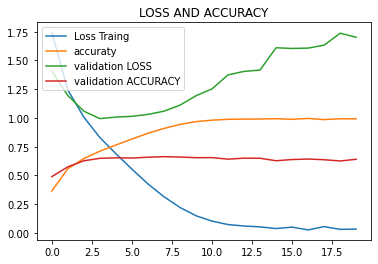

In [208]:
#show biểu đồ của các hàng số của H.
fig = plt.figure()
echo =  20

plt.plot(np.arange(0,echo),H.history["loss"],label="Loss Traing")
plt.plot(np.arange(0,echo),H.history["accuracy"],label="accuraty")
plt.plot(np.arange(0,echo),H.history["val_loss"],label="validation LOSS")
plt.plot(np.arange(0,echo),H.history["val_accuracy"],label="validation ACCURACY")

plt.title("LOSS AND ACCURACY")
plt.legend() # khoong áp dụng thêm thuộc tính nào vào biểu đồ.

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


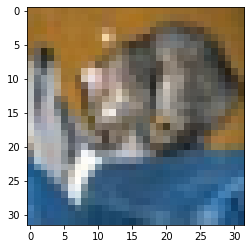

In [209]:
plt.imshow(X_test[0].reshape(32,32,3))   
print(y_test[0])

In [210]:
print(y_test[0])  #day la mèo

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [211]:
DU_DOAN = model.predict(X_test[0].reshape(1,32,32,3))
DU_DOAN
print("giá trị dự đoán là: ",np.argmax(DU_DOAN))

1/1 [==============================] - 0s 57ms/step
giá trị dự đoán là:  2
